In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
import os
os.chdir(r'C:\Users\klpna\OneDrive\Desktop\explainable-credit-risk')

In [4]:
train_df=pd.read_csv('data/preprocessed_credit_data.csv')

In [5]:
test_df=pd.read_csv('data/test_df.csv')

In [9]:
x_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
x_train.shape

(145886, 10)

In [11]:
x_train=train_df.drop('SeriousDlqin2yrs', axis=1)
y_train=train_df['SeriousDlqin2yrs']
x_test=test_df.drop('SeriousDlqin2yrs', axis=1)
y_test=test_df['SeriousDlqin2yrs']

In [12]:
#model loading

In [13]:
model=LogisticRegression()

In [14]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred=model.predict(x_train)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split training data: 80% train, 20% validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_sub, y_train_sub)

# Predict on validation set
val_preds = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.7447049146617314


Confusion Matrix:
 [[13212  3575]
 [ 3874  8517]]


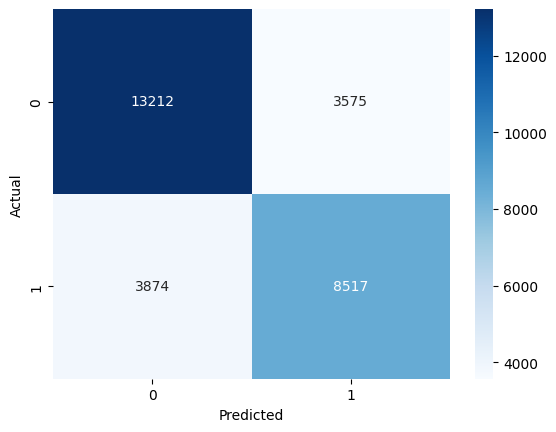

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, val_preds)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_val, val_preds)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     16787
           1       0.70      0.69      0.70     12391

    accuracy                           0.74     29178
   macro avg       0.74      0.74      0.74     29178
weighted avg       0.74      0.74      0.74     29178



In [19]:
from sklearn.metrics import roc_auc_score

y_probs = model.predict_proba(X_val)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_val, y_probs)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8234631458408825


C:\Users\klpna\OneDrive\Desktop\explainable-credit-risk\credit_risk_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:40:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.869422167386387


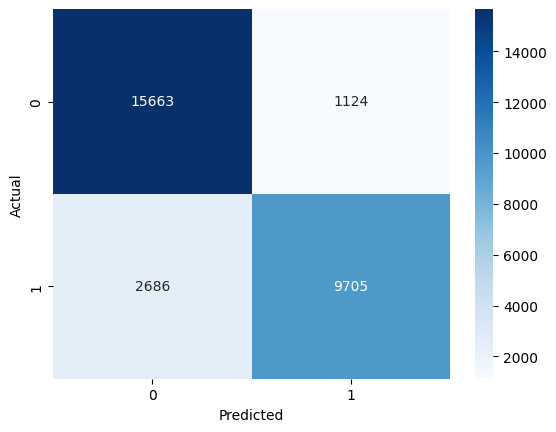

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     16787
           1       0.90      0.78      0.84     12391

    accuracy                           0.87     29178
   macro avg       0.87      0.86      0.86     29178
weighted avg       0.87      0.87      0.87     29178

ROC-AUC Score: 0.9432989185684875


In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
model = xgb.XGBClassifier(
    objective='binary:logistic',  
    eval_metric='logloss',        
    use_label_encoder=False,
    n_estimators=100,              
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# -------------------------------
# 5. Train the Model
# -------------------------------
model.fit(x_train, y_train)

# -------------------------------
# 6. Evaluate on Validation Set
# -------------------------------
val_preds = model.predict(X_val)
val_probs = model.predict_proba(X_val)[:, 1]

# Accuracy
accuracy = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_val, val_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_val, val_preds))

# ROC-AUC Score
roc_auc = roc_auc_score(y_val, val_probs)
print("ROC-AUC Score:", roc_auc)

# -------------------------------
# 7. Predict on Test Data
# -------------------------------
test_preds = model.predict(x_test)  # test_df has no target column


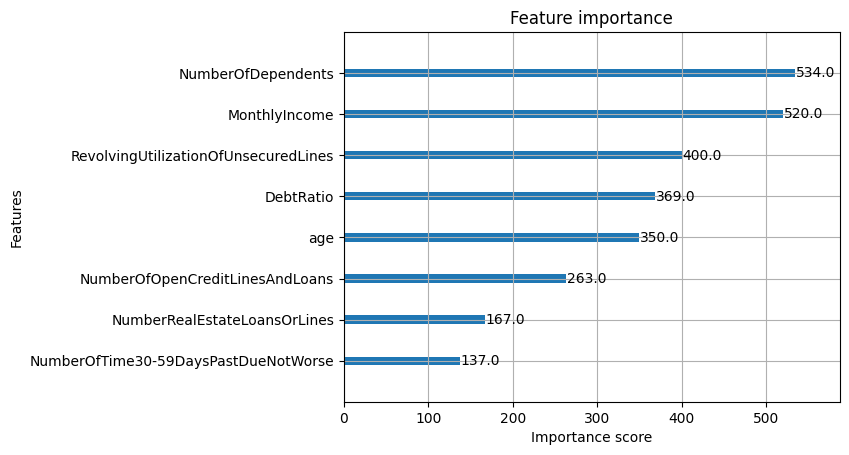

In [20]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


In [21]:
from joblib import dump,load

In [22]:
dump(model,'models/credit_risk_model.joblib')

['models/credit_risk_model.joblib']